### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [ ]:
# !unzip MNIST_data.zip
# !ls

Archive:  MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
MNIST_data.zip	sample_data  test.csv  train.csv


In [ ]:
data = pd.read_csv('MNIST_data/train.csv')
X_test = pd.read_csv("MNIST_data/test.csv")

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [7]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [14]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_x[['pixel258', 'pixel252']].describe()

,pixel258,pixel252
count,42000.000000,42000.000000
mean,19.544690,0.009548
std,60.344379,1.189063
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,255.000000,184.000000


### Data visualization

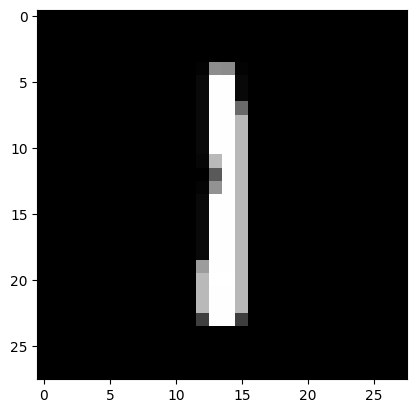

In [19]:
img = data_x.iloc[2].values.reshape((28,28))
plt.imshow(img,cmap='grey')

In [13]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        141, 139,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        254, 254,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [20]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [21]:
# Model 1
# model = keras.Sequential([
#     keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model 2
model = keras.Sequential([
        # Reshape the input to (28, 28, 1) for Conv2D layers (height, width, channels)
        keras.layers.Reshape((28,28,1), input_shape=(784, )),

        # Convolutional layer to extract features like edges and patterns from the image
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),

        # MaxPooling layer to reduce spatial dimensions and computational cost, also adds robustness
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Another convolutional layer to learn more complex features from the downsampled feature maps
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

        # Another MaxPooling layer to further reduce spatial dimensions and focus on important features
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the 2D feature maps to a 1D vector for the Dense layers
        keras.layers.Flatten(),

        # Dense (fully connected) layer to learn high-level features and relationships
        keras.layers.Dense(128, activation='relu'),

        # Dropout layer to prevent overfitting by randomly dropping out neurons during training
        keras.layers.Dropout(0.5),

        # Output Dense layer with 10 neurons (one for each digit) and softmax activation for classification
        keras.layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [38]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.6942 - loss: 2.4082 - val_accuracy: 0.9717 - val_loss: 0.1009
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9393 - loss: 0.2078 - val_accuracy: 0.9769 - val_loss: 0.0723
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9590 - loss: 0.1356 - val_accuracy: 0.9810 - val_loss: 0.0592
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9692 - loss: 0.1045 - val_accuracy: 0.9831 - val_loss: 0.0656
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9735 - loss: 0.0884 - val_accuracy: 0.9850 - val_loss: 0.0502


### Model evaluation

In [39]:
model.predict(X_test).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
The predicted label is: 8


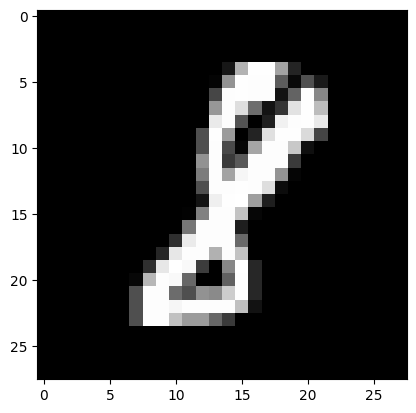

In [40]:
img = X_test.iloc[123].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[123])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance

In [41]:
y_pred = model.predict(X_val).argmax(axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[402   0   0   0   0   3   3   0   0   0]
 [  0 466   0   1   1   0   1   2   0   0]
 [  0   0 412   4   2   0   0   1   1   0]
 [  0   0   1 499   0   3   0   3   0   0]
 [  1   0   0   0 386   0   1   1   1   7]
 [  0   0   0   1   0 334   2   1   0   1]
 [  0   1   0   0   0   1 397   0   3   0]
 [  0   0   3   0   0   0   0 433   2   0]
 [  1   0   0   1   0   0   0   2 399   0]
 [  0   0   1   2   0   1   0   1   2 409]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      0.99      0.99       471
           2       0.99      0.98      0.98       420
           3       0.98      0.99      0.98       506
           4       0.99      0.97      0.98       397
           5       0.98      0.99      0.98       339
           6       0.98      0.99      0.99       402
           7       0.98      0.99      0.98       438
           8       0.98      0.99      0.98       403
           9       0.98     